1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import pylab as pl

2. Import Data

In [2]:
# Create Path to Main Project Folder
path = r'/Users/seema/Documents/CareerFoundry/A6/Data Project'

In [3]:
df_happiness = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'happiness_cleaned.csv'), index_col = False)

In [4]:
df_happiness.head()

,Unnamed: 0,Rank,Country,Score,GDP Per Capita,Social Support,Life Expectancy,Freedom,Generosity,Perception of Corruption
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
df_happiness.shape

(156, 10)

3. Data Cleaning & Manipulations

In [9]:
# Drop Unnecessary Columns
df_happiness = df_happiness.drop(['Unnamed: 0', 'Country'], axis = 1)

In [10]:
# Confirm No Categorical Values
df_happiness.dtypes

Rank                          int64
Score                       float64
GDP Per Capita              float64
Social Support              float64
Life Expectancy             float64
Freedom                     float64
Generosity                  float64
Perception of Corruption    float64
dtype: object

4. Elbow Technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df_happiness).score(df_happiness) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/seema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/seema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/seema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/seema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

[-316600.58699341025,
 -79209.70638260563,
 -35198.63372842308,
 -19865.30163401443,
 -12747.127168318395,
 -8859.809200289159,
 -6491.423251713722,
 -4986.617345435673,
 -3963.1168993661204]

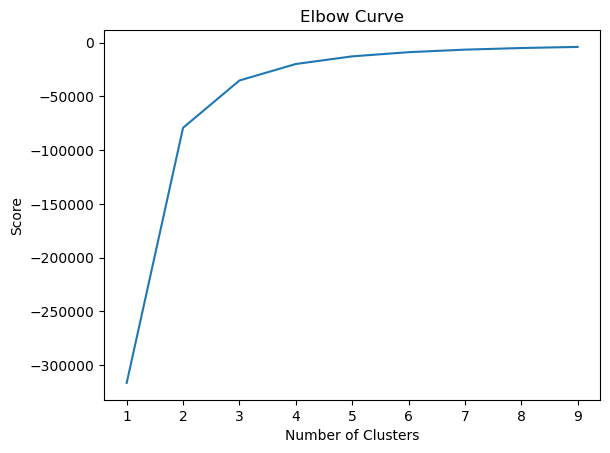

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a steep increase from 1 to 3 and after 4 the curve appears to flatten. The optimal number of clusters is likely 3 and otherwise could be 4.

5. K-Means Clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df_happiness)

/Users/seema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [17]:
df_happiness['clusters'] = kmeans.fit_predict(df_happiness)

/Users/seema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
df_happiness.head()

,Rank,Score,GDP Per Capita,Social Support,Life Expectancy,Freedom,Generosity,Perception of Corruption,clusters
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1


In [19]:
df_happiness['clusters'].value_counts()

clusters
1    52
0    52
2    52
Name: count, dtype: int64

/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


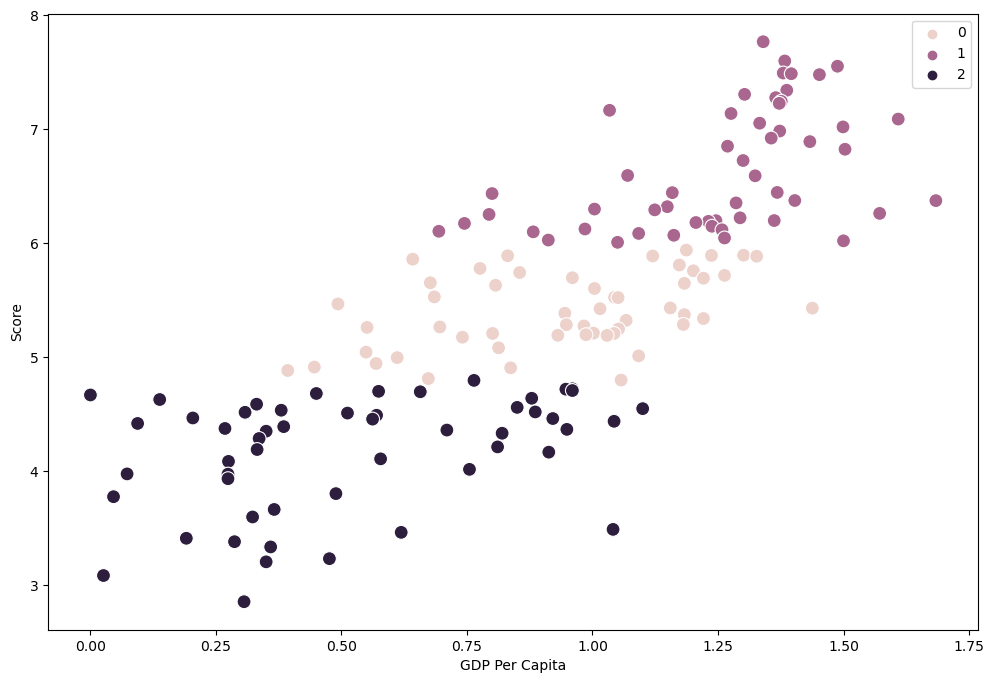

In [20]:
# Plot the clusters for the "Score" and "GDP Per Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness['GDP Per Capita'], y=df_happiness['Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP Per Capita') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


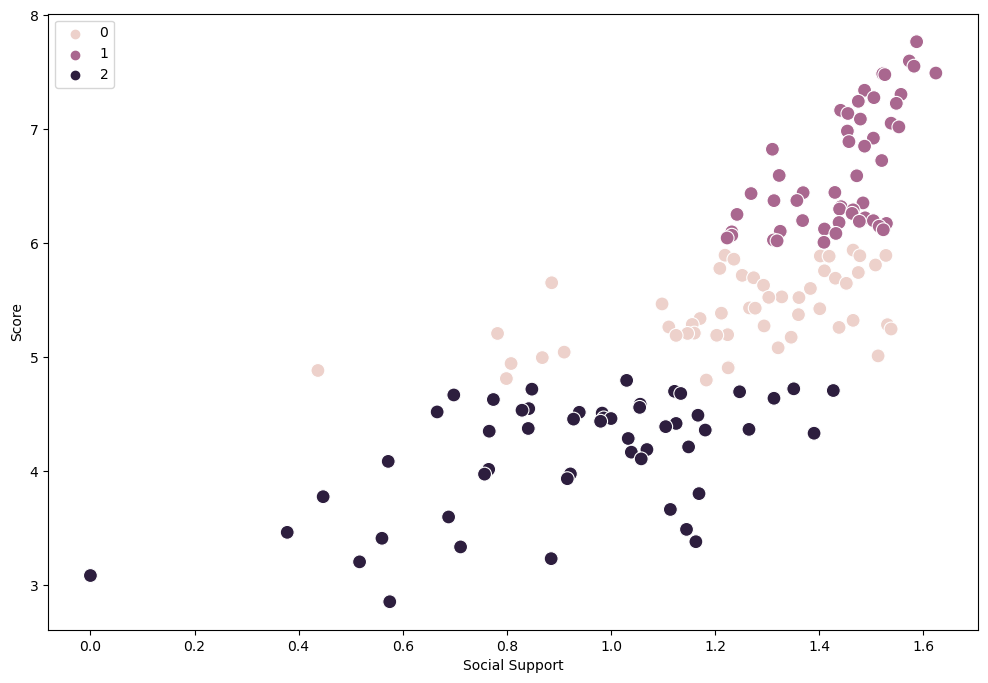

In [21]:
# Plot the clusters for the "Score" and "Social Support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness['Social Support'], y=df_happiness['Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Social Support') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


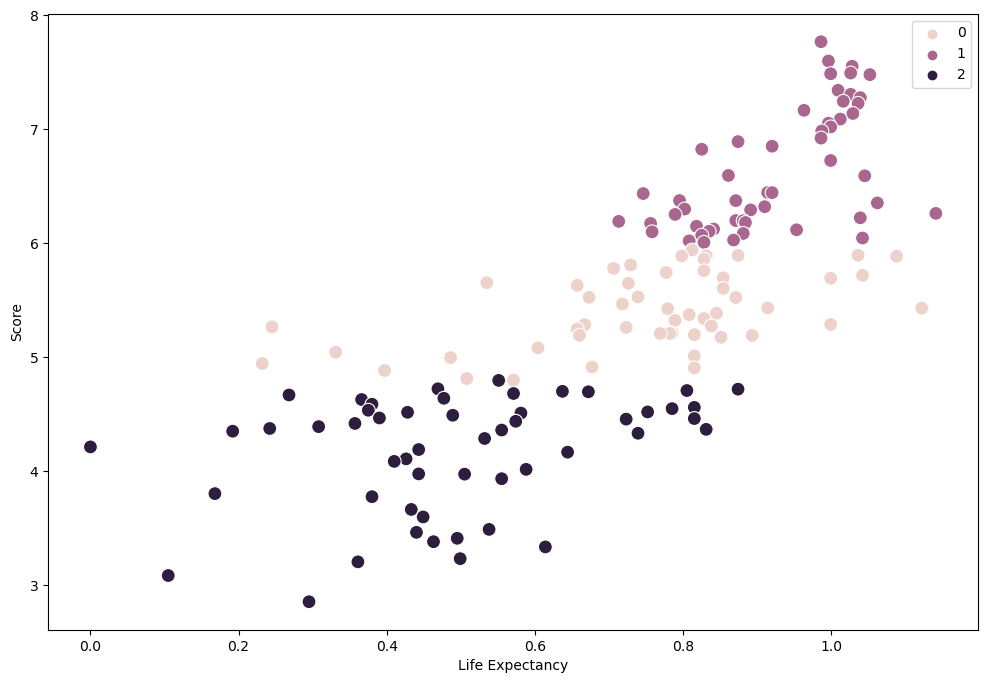

In [22]:
# Plot the clusters for the "Score" and "Life Expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness['Life Expectancy'], y=df_happiness['Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Life Expectancy') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

The clusters make sense because a higher score appears to be associated with higher GDP Per Capita, Social Support, and Life Expectancy.

In [23]:
df_happiness.loc[df_happiness['clusters'] == 2, 'cluster'] = 'dark purple'
df_happiness.loc[df_happiness['clusters'] == 1, 'cluster'] = 'purple'
df_happiness.loc[df_happiness['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/n3/lnt6wvj12kzbvn40w88d_tf40000gn/T/ipykernel_38072/1502874903.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_happiness.loc[df_happiness['clusters'] == 2, 'cluster'] = 'dark purple'


In [24]:
df_happiness.groupby('cluster').agg({'GDP Per Capita':['mean', 'median'], 
                         'Social Support':['mean', 'median'], 
                         'Life Expectancy':['mean', 'median'],
                          'Score':['mean', 'median']})

GDP Per Capita         Social Support         Life Expectancy  \
                      mean  median           mean  median            mean   
cluster                                                                     
dark purple       0.520615  0.4630       0.936154  0.9845        0.496288   
pink              0.943212  0.9945       1.248212  1.2755        0.753462   
purple            1.251615  1.2970       1.442077  1.4640        0.925981   

                       Score          
            median      mean  median  
cluster                               
dark purple  0.483  4.170192  4.3630  
pink         0.787  5.406288  5.3795  
purple       0.920  6.644808  6.4400

The purple cluster with the higher score has the highest mean and median values for the three variables, which makes sense because greater GDP Per Capita, Social Support, and Life Expectancy are positive qualities that would likely make people happier.

These results could be useful to forecast the happiness score based on values for GDP Per Capita, Social Support, and Life Expectancy.